<a href="https://colab.research.google.com/github/Nandika28/Task2_ObjectDetection/blob/master/Task2_detr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 197 (delta 0), reused 0 (delta 0), pack-reused 193
Receiving objects: 100% (197/197), 12.83 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
%cd detr

/content/detr


In [ ]:
!pip install -r requirements.txt
!pip install -c pytorch pytorch torchvision
!pip install cython scipy
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install git+https://github.com/cocodataset/panopticapi.git

     |████████████████████████████████| 61kB 1.7MB/s 
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-nmjcltqf/panopticapi
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-install-nmjcltqf/panopticapi
     |████████████████████████████████| 7.4MB 7.0MB/s 
     |████████████████████████████████| 4.4MB 39.2MB/s 
  Created wheel for panopticapi: filename=panopticapi-0.1-cp36-none-any.whl size=8317 sha256=ed3306b72f4a8b7a54122ee99298050381e8f9c6937a093fc8523e3ab4c11979
  Stored in directory: /tmp/pip-ephem-wheel-cache-jtu2qk_q/wheels/41/ae/17/f7e628e1ba4776ceea035aefb113ef24b6639ad5d5a2e5a5d1
Successfully built panopticapi
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-h1k3753f
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-h1k3753f
  Created wheel for pycocotools:

In [ ]:
!mkdir /content/data

In [ ]:
#downloading the training set of images with annotations converted to coco json format using https://app.roboflow.ai
#I used the site https://app.roboflow.ai to convert the yolo labels into coco json format
!curl -L "https://app.roboflow.ai/ds/TQPgMxvHTH?key=gWCtIvoiAp" > roboflow.zip
!unzip roboflow.zip -d /content/data 
!rm roboflow.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0    306      0  0:00:02  0:00:02 --:--:--   306
100 15.1M  100 15.1M    0     0  3428k      0  0:00:04  0:00:04 --:--:-- 19.1M
Archive:  roboflow.zip
 extracting: /content/data/test/00149fd0a01cc623_jpg.rf.160f9b4e7631a6aaff4793b69d01ebf6.jpg  
 extracting: /content/data/test/0903911c4ca2039c_jpg.rf.4115724382d9a95703a25a65515437ea.jpg  
 extracting: /content/data/test/6f90183409f23094_jpg.rf.04706bca500158cebf0df0bfa5421955.jpg  
 extracting: /content/data/test/be0d61c3534454ad_jpg.rf.0f34ab0d6ad17e670ebe5399eb7c2447.jpg  
 extracting: /content/data/test/98f778a1e4596438_jpg.rf.0c273797e153dab9624e3f2028fd857a.jpg  
 extracting: /content/data/test/0ea75c93c626c325_jpg.rf.5ce25bb6f3fe5c8384d3bee9d482e2a8.jpg  
 extracting: /content/data/test/0bedac678c600427_jpg.rf.26d2ecb0895dedd226ec142ee2bbf17b.jp

In [ ]:
!cat /content/data/valid/_annotations.coco.json

{
    "info": {
        "year": "2020",
        "version": "1",
        "description": "Exported from roboflow.ai",
        "contributor": "",
        "url": "https://app.roboflow.ai/datasets/oid/1",
        "date_created": "2020-08-02T09:28:30+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "",
            "name": "Unknown"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "train",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "Alpaca",
            "supercategory": "train"
        },
        {
            "id": 2,
            "name": "Apple",
            "supercategory": "train"
        },
        {
            "id": 3,
            "name": "Backpack",
            "supercategory": "train"
        },
        {
            "id": 4,
            "name": "Bus",
            "supercategory": "train"
        },
        {
            "id": 5,
            "name": "Cake",
  

In [ ]:
!mkdir /content/data/annotations/

In [ ]:
%mv  /content/data/train/_annotations.coco.json /content/data/annotations/instances_train2017.json


In [ ]:
%mv /content/data/valid/_annotations.coco.json /content/data/annotations/instances_val2017.json

In [ ]:
%mv /content/data/train /content/data/train2017
%mv /content/data/valid /content/data/val2017

In [ ]:
!cat /content/data/annotations/instances_val2017.json

{
    "info": {
        "year": "2020",
        "version": "1",
        "description": "Exported from roboflow.ai",
        "contributor": "",
        "url": "https://app.roboflow.ai/datasets/oid/1",
        "date_created": "2020-08-02T09:28:30+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "",
            "name": "Unknown"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "train",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "Alpaca",
            "supercategory": "train"
        },
        {
            "id": 2,
            "name": "Apple",
            "supercategory": "train"
        },
        {
            "id": 3,
            "name": "Backpack",
            "supercategory": "train"
        },
        {
            "id": 4,
            "name": "Bus",
            "supercategory": "train"
        },
        {
            "id": 5,
            "name": "Cake",
  

In [ ]:
!nvidia-smi

Tue Aug 11 15:01:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/detr

/content/detr


In [ ]:
!pwd

/content/detr


In [ ]:
#just testing with 10 epochs
!python main.py --coco_path /content/data --epochs 10 --output_dir "/content/backups" 

Not using distributed mode
git:
  sha: 48cf0a76913bb405257f16a3b8f696e4c728d394, status: clean, branch: master

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/data', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=10, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='/content/backups', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 41302368
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memor

In [ ]:
!python main.py --batch_size 2 --no_aux_loss --eval --resume '/content/backups/checkpoint.pth' --coco_path /content/data 

Not using distributed mode
git:
  sha: 48cf0a76913bb405257f16a3b8f696e4c728d394, status: clean, branch: master

Namespace(aux_loss=False, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/data', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=300, eval=True, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/backups/checkpoint.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 41302368
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annota

In [ ]:
import torch
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=False)
checkpoint = torch.load("/content/backups/checkpoint.pth", map_location='cpu')
model.load_state_dict(checkpoint['model'])


Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip


<All keys matched successfully>

In [ ]:
model.eval()
model = model.cuda()

In [ ]:
import torchvision.transforms as T
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

CLASSES = [
    'N/A', 'Alpaca', 'Apple', 'Backpack', 'Bus', 'Cake', 'Clock',
    'Dagger', 'Orange', 'Pancake', 'Panda'
    
]

In [ ]:
url = input()

https://upload.wikimedia.org/wikipedia/commons/7/7b/Orange-Whole-%26-Split.jpg


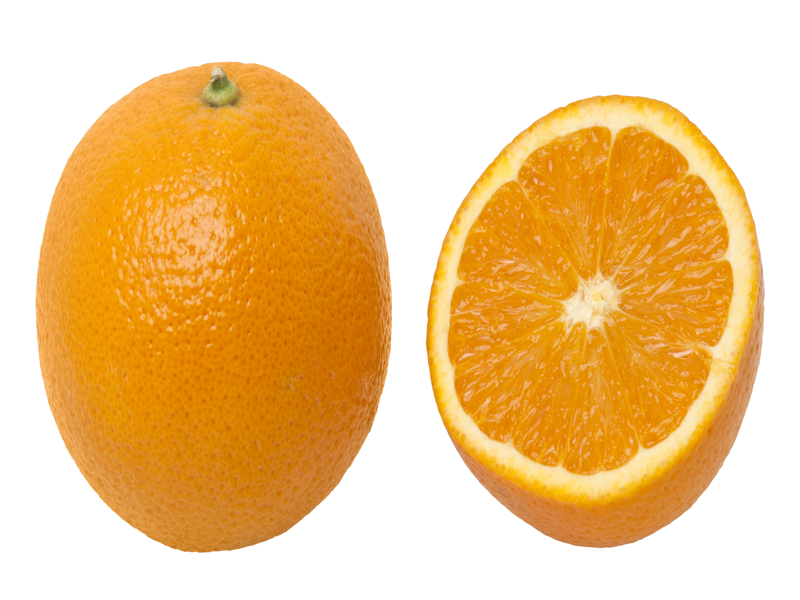

In [ ]:
from PIL import Image
import requests
img = Image.open(requests.get(url, stream=True).raw).resize((800,600)).convert('RGB')
img

In [ ]:
img_tens = transform(img).unsqueeze(0).cuda()

In [ ]:
with torch.no_grad():
  output = model(img_tens)

In [ ]:
from PIL import ImageDraw
from PIL import ImageChops
im2 = img.copy()
drw = ImageDraw.Draw(im2)
pred_logits=output['pred_logits'][0][:, :len(CLASSES)]
pred_boxes=output['pred_boxes'][0]

max_output = pred_logits.softmax(-1).max(-1)
topk = max_output.values.topk(15)

pred_logits = pred_logits[topk.indices]
pred_boxes = pred_boxes[topk.indices]
pred_logits.shape

torch.Size([15, 11])

In [ ]:
for logits, box in zip(pred_logits, pred_boxes):
  print(logits)
  cls = logits.argmax()
  if cls >= len(CLASSES):
    continue
  label = CLASSES[cls]
  print(label)
  box = box.cpu() * torch.Tensor([800, 600, 800, 600])
  x, y, w, h = box
  x0, x1 = x-w//2, x+w//2
  y0, y1 = y-h//2, y+h//2
  drw.rectangle([x0, y0, x1, y1], outline='purple', width=5)
  drw.text((x, y), label, fill='blue')

tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.8687,  0.8170,  1.7453,  2.0839,  0.3952,  0.5515,  0.4475,
         2.3510,  2.3039,  0.8507], device='cuda:0')
Orange
tensor([-7.1889,  0.

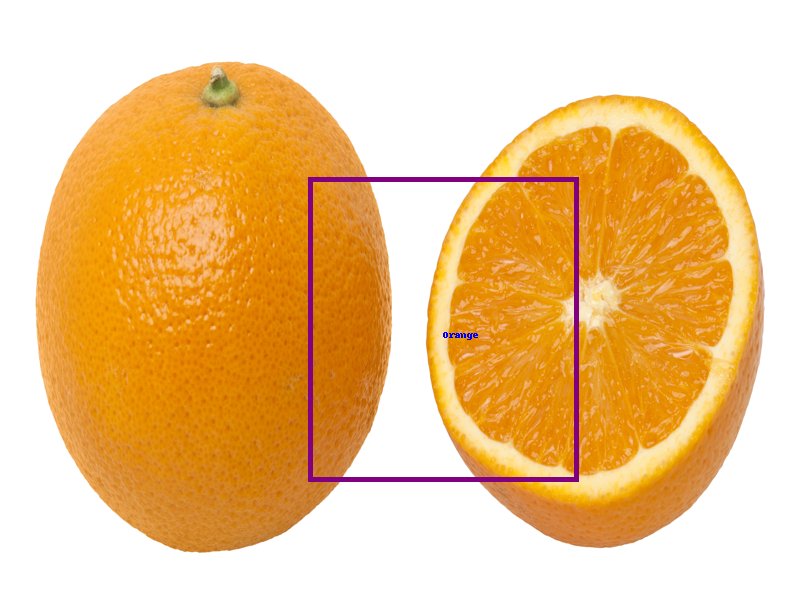

In [ ]:
im2

In [ ]:
#https://upload.wikimedia.org/wikipedia/commons/7/7b/Orange-Whole-%26-Split.jpg

In [ ]:
#https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Fs-dagger.jpg/300px-Fs-dagger.jpg

In [ ]:
#https://images-dynamic-arcteryx.imgix.net/F20/1350x1710/Blade-28-Backpack-Cobalt-Moon.jpg?auto=format&w=1350

In [ ]:
'N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A',
    'N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A',
    'N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A',
    'N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A','N/A'

In [ ]:
#https://www.youtube.com/watch?v=4eIBisqx9_g